# **Data Gathering**

In [ ]:
!pip install cryptocmd

In [ ]:

from cryptocmd import CmcScraper

# initialise scraper without time interval
scraper = CmcScraper("BTC")

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
xrp_json_data = scraper.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper.export("csv", name="btc_all_time")

# Pandas dataFrame for the same data
df = scraper.get_dataframe()

df.to_csv(index=False)

In [ ]:

import pandas as pd
btc = pd.read_csv('btc_all_time.csv')
btc.columns = ['date','open', 'high','low','close','volume','amount']
btc['date'] = pd.to_datetime(btc['date'], dayfirst=True)

btc.sort_values(by=['date'])

,date,open,high,low,close,volume,amount
2786,2013-04-28,135.300003,135.979996,132.100006,134.210007,0.000000e+00,1.488567e+09
2785,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09
2784,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09
2783,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09
2782,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09
...,...,...,...,...,...,...,...
4,2020-12-09,18320.884784,18626.292652,17935.547820,18553.915377,3.442037e+10,3.444865e+11
3,2020-12-10,18553.299728,18553.299728,17957.065213,18264.992107,2.554713e+10,3.391369e+11
2,2020-12-11,18263.929255,18268.452845,17619.532389,18058.903347,2.791964e+10,3.353262e+11
1,2020-12-12,18051.319990,18919.551228,18046.040724,18803.656870,2.175258e+10,3.491706e+11


In [ ]:
import numpy as np

#m1 = btc.date <= '2020-12-04'
btc = btc[btc.date <= '2020-12-04']
btc.head()

,date,open,high,low,close,volume,amount
9,2020-12-04,19446.966422,19511.404714,18697.192914,18699.765613,3.387239e+10,3.471114e+11
10,2020-12-03,19205.925404,19566.191884,18925.784434,19445.398480,3.193032e+10,3.609339e+11
11,2020-12-02,18801.743593,19308.330663,18347.717838,19201.091157,3.738770e+10,3.563810e+11
12,2020-12-01,19633.770447,19845.975483,18321.920930,18802.998300,4.963366e+10,3.489766e+11
13,2020-11-30,18178.322118,19749.263694,18178.322118,19625.835029,4.772848e+10,3.642297e+11


In [ ]:
nasdaq = pd.read_csv('^IXIC.csv')
nasdaq = nasdaq.drop(columns=['Adj Close'])
nasdaq.columns = ['date','nas_open','nas_high','nas_low','nas_close','nas_volume']
nasdaq['date'] = pd.to_datetime(nasdaq['date'])

In [ ]:
nasdaq.tail()

,date,nas_open,nas_high,nas_low,nas_close,nas_volume
1912,2020-11-30,12224.250000,12244.650391,12027.160156,12198.740234,7693430000
1913,2020-12-01,12313.360352,12405.790039,12263.929688,12355.110352,6467180000
1914,2020-12-02,12285.750000,12360.059570,12217.349609,12349.370117,5150820000
1915,2020-12-03,12369.259766,12439.019531,12356.990234,12377.179688,5182100000
1916,2020-12-04,12399.320313,12464.230469,12376.440430,12464.230469,5044210000


In [ ]:
volatility = pd.read_csv('^VIX.csv')
volatility = volatility.drop(columns =['Adj Close', 'Volume']) 
#nasdaq = nasdaq.drop(columns=['Adj Close','Volume'])
volatility.columns = ['date','vol_open','vol_high','vol_low','vol_close']
volatility['date'] = pd.to_datetime(volatility['date'])

In [ ]:
volatility.tail()

,date,vol_open,vol_high,vol_low,vol_close
1912,2020-11-30,22.639999,22.889999,20.480000,20.570000
1913,2020-12-01,20.209999,20.920000,20.000000,20.770000
1914,2020-12-02,21.000000,21.250000,20.040001,21.170000
1915,2020-12-03,21.240000,21.879999,20.719999,21.280001
1916,2020-12-04,21.049999,21.150000,19.969999,20.790001


In [ ]:
data = pd.merge(btc, nasdaq,
how='left', on='date')

In [ ]:
data = pd.merge(data, volatility,
how='left', on='date')

In [ ]:
data.set_index(('date'),inplace = True) 



In [ ]:
data.tail()

,open,high,low,close,volume,amount,nas_open,nas_high,nas_low,nas_close,nas_volume,vol_open,vol_high,vol_low,vol_close
date,,,,,,,,,,,,,,,
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,3306.149902,3344.899902,3305.810059,3340.620117,1.757480e+09,14.48,14.48,13.58,13.59
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,3325.350098,3330.020020,3296.500000,3299.129883,1.884600e+09,13.88,14.67,13.87,14.49
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,3308.050049,3328.790039,3298.580078,3328.790039,1.984270e+09,13.71,14.28,13.51,13.52
2013-04-29,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09,3290.310059,3315.330078,3289.419922,3307.020020,1.594110e+09,13.72,13.94,13.36,13.71
2013-04-28,135.300003,135.979996,132.100006,134.210007,0.0,1.488567e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

m1 = data.index > '2013-04-27'
data = data[np.logical_and.reduce([m1])]

In [ ]:
data.tail()

,open,close,high,low,volume,amount,nas_open,nas_high,nas_low,nas_close,nas_volume,vol_open,vol_high,vol_low,vol_close
date,,,,,,,,,,,,,,,
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,3306.149902,3344.899902,3305.810059,3340.620117,1.757480e+09,14.48,14.48,13.58,13.59
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,3325.350098,3330.020020,3296.500000,3299.129883,1.884600e+09,13.88,14.67,13.87,14.49
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,3308.050049,3328.790039,3298.580078,3328.790039,1.984270e+09,13.71,14.28,13.51,13.52
2013-04-29,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09,3290.310059,3315.330078,3289.419922,3307.020020,1.594110e+09,13.72,13.94,13.36,13.71
2013-04-28,135.300003,135.979996,132.100006,134.210007,0.0,1.488567e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Feature Engineering**

Fill the NA value in Nasdaq and Volatility datasets with the average of neighbour data.

In [ ]:
data = pd.concat([data.ffill(), data.bfill()]).groupby(level=0).mean()


In [ ]:
data.head()

,open,high,low,close,volume,amount,nas_open,nas_high,nas_low,nas_close,nas_volume,vol_open,vol_high,vol_low,vol_close
date,,,,,,,,,,,,,,,
2013-04-28,135.300003,135.979996,132.100006,134.210007,0.0,1.488567e+09,3290.310059,3315.330078,3289.419922,3307.020020,1.594110e+09,13.72,13.94,13.36,13.71
2013-04-29,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09,3290.310059,3315.330078,3289.419922,3307.020020,1.594110e+09,13.72,13.94,13.36,13.71
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,3308.050049,3328.790039,3298.580078,3328.790039,1.984270e+09,13.71,14.28,13.51,13.52
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,3325.350098,3330.020020,3296.500000,3299.129883,1.884600e+09,13.88,14.67,13.87,14.49
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,3306.149902,3344.899902,3305.810059,3340.620117,1.757480e+09,14.48,14.48,13.58,13.59


Add more technical indicators

In [ ]:
!pip install stockstats
#!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import datetime
# from finrl.config import config
# from finrl.marketdata.yahoodownloader import YahooDownloader
# from finrl.preprocessing.preprocessors import FeatureEngineer
# from finrl.preprocessing.data import data_split
# from finrl.env.environment import EnvSetup
# from finrl.env.EnvMultipleStock_train import StockEnvTrain
# from finrl.env.EnvMultipleStock_trade import StockEnvTrade
# from finrl.model.models import DRLAgent
# from finrl.trade.backtest import BackTestStats, BaselineStats, BackTestPlot
import stockstats as Sdf
tech_indicator_list = ['macd', 'rsi_30', 'cci_30', 'dx_30', 'kdjk', 'open_2_sma', 'boll', 'close_10.0_le_5_c', 'wr_10', 'dma', 'trix']



In [ ]:
stock = Sdf.StockDataFrame.retype(data)
for i in tech_indicator_list:
  indicator_df = pd.DataFrame()
  indicator_df = stock.get(i)
  data[i] = indicator_df


data.head()

,open,high,low,close,volume,amount,nas_open,nas_high,nas_low,nas_close,nas_volume,vol_open,vol_high,vol_low,vol_close,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh,rsi_30,cci_30,dx_30,kdjk,open_2_sma,boll,close_10.0_le_5_c,wr_10,dma,trix
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-04-28,135.300003,135.979996,132.100006,134.210007,0.0,1.488567e+09,3290.310059,3315.330078,3289.419922,3307.020020,1.594110e+09,13.72,13.94,13.36,13.71,134.210007,134.210007,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,51.460535,135.300003,134.210007,0.0,45.618396,0.0,NaN
2013-04-29,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09,3290.310059,3315.330078,3289.419922,3307.020020,1.594110e+09,13.72,13.94,13.36,13.71,139.805416,139.573654,0.231763,0.128757,0.128757,0.103006,100.000000,66.666667,100.000000,61.254399,134.872002,139.375000,0.0,19.157871,0.0,1.223239
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,3308.050049,3328.790039,3298.580078,3328.790039,1.984270e+09,13.71,14.28,13.51,13.52,139.491062,139.367545,0.123517,0.126609,0.126609,-0.003093,64.317150,28.101741,100.000000,55.782964,139.222000,139.250000,0.0,55.159906,0.0,0.651420
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,3325.350098,3330.020020,3296.500000,3299.129883,1.884600e+09,13.88,14.67,13.87,14.49,132.388355,133.111761,-0.723406,-0.161336,-0.161336,-0.562069,26.075869,-130.183634,44.666333,44.958705,141.500000,133.684999,0.0,76.689812,0.0,-0.098469
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,3306.149902,3344.899902,3305.810059,3340.620117,1.757480e+09,14.48,14.48,13.58,13.59,125.004093,126.641227,-1.637134,-0.600353,-0.600353,-1.036781,19.617781,-123.227755,61.927102,37.778431,127.689999,127.989999,0.0,76.582119,0.0,-0.669030


In [ ]:

data.to_csv('data.csv',index=True)

# **Traditional Trading Indicator VWAP Approach**

In [ ]:
#df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
# def vwap(df):
#     q = df.volume
#     p = (df.close + df.open)/2
#     return df.assign(vwap=(p * q) / q.shift(1))

# data_vwap = data.groupby(data.index, group_keys=False).apply(vwap)
# data_vwap.tail()

,open,high,low,close,volume,amount,nas_open,nas_high,nas_low,nas_close,nas_volume,vol_open,vol_high,vol_low,vol_close,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh,rsi_30,cci_30,dx_30,kdjk,open_2_sma,boll,close_10.0_le_5_c,wr_10,dma,trix,vwap
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-01,19633.770447,19845.975483,18321.920930,18802.998300,4.963366e+10,3.489766e+11,12313.360352,12405.790039,12263.929688,12355.110352,6.467180e+09,20.209999,20.920000,20.000000,20.770000,18152.236144,17148.343213,1003.892931,1074.659357,1074.659357,-70.766426,65.684937,104.615445,34.710688,68.321773,18906.046283,17751.025240,0.0,29.842486,3196.147830,0.929554,NaN
2020-12-02,18801.743593,19308.330663,18347.717838,19201.091157,3.738770e+10,3.563810e+11,12285.750000,12360.059570,12217.349609,12349.370117,5.150820e+09,21.000000,21.250000,20.040001,21.170000,18313.598453,17300.398616,1013.199837,1062.367453,1062.367453,-49.167616,66.850786,97.508828,34.710688,72.730536,19217.757020,17897.262600,0.0,18.451939,3123.752858,0.903078,NaN
2020-12-03,19205.925404,19566.191884,18925.784434,19445.398480,3.193032e+10,3.609339e+11,12369.259766,12439.019531,12356.990234,12377.179688,5.182100e+09,21.240000,21.879999,20.719999,21.280001,18487.721534,17459.287495,1028.434040,1055.580771,1055.580771,-27.146731,67.550690,109.384141,37.261522,77.999815,19003.834499,18053.642115,0.0,11.461625,3071.562715,0.885699,NaN
2020-12-04,19446.966422,19511.404714,18697.192914,18699.765613,3.387239e+10,3.471114e+11,12399.320313,12464.230469,12376.440430,12464.230469,5.044210e+09,21.049999,21.150000,19.969999,20.790001,18520.343700,17551.174763,969.168938,1038.298404,1038.298404,-69.129466,63.329062,88.430109,32.361048,74.401123,19326.445913,18185.223460,0.0,32.796262,2886.704512,0.855115,NaN
2020-12-05,18698.385279,19160.449265,18590.193675,19154.231131,2.724246e+10,3.555639e+11,12399.320313,12464.230469,12376.440430,12464.230469,5.044210e+09,21.049999,21.150000,19.969999,20.790001,18617.864844,17669.919679,947.945165,1020.227756,1020.227756,-72.282592,64.719292,84.093028,30.038075,75.987920,19072.675850,18345.155645,0.0,19.792735,2772.273379,0.825145,NaN


In [ ]:
data_vwap = data.assign(vwap=(data.volume * (data.close + data.open)/2) / data.volume.shift(1))

In [ ]:
data_vwap = data_vwap.dropna()

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt


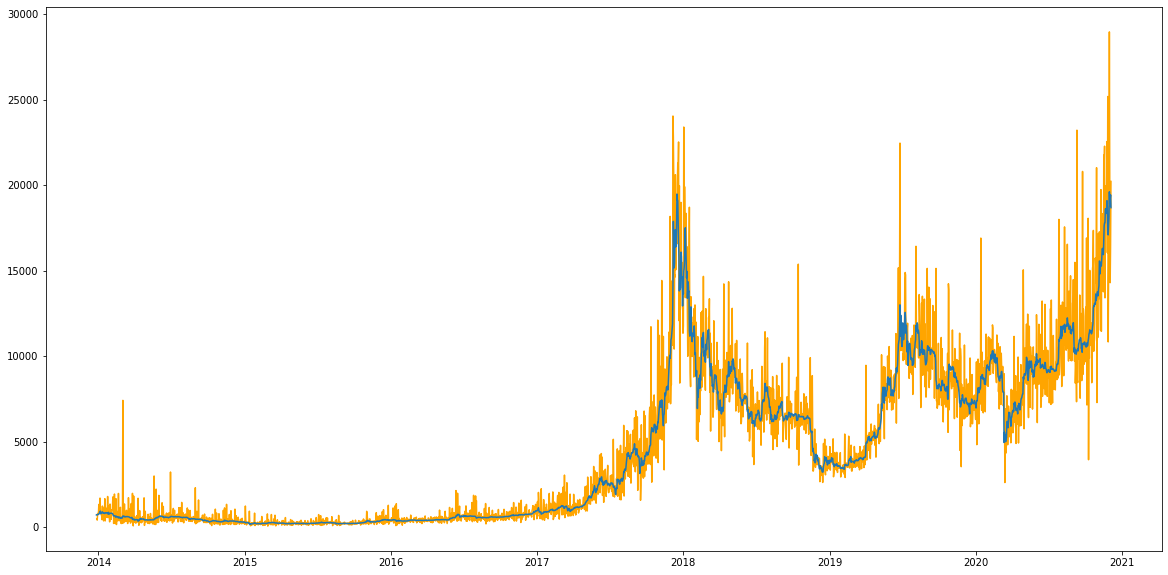

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(data_vwap['vwap'],color = 'orange')
plt.plot(data_vwap['close'])


In [ ]:
import math
import numpy as np
testScore = math.sqrt(np.square(np.subtract(data_vwap['close'],data_vwap['vwap'])).mean())
print('Train Score: %.2f RMSE' % testScore)

Train Score: inf RMSE


#**Time Series Models**




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
!pip install pmdarima
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
df = pd.read_csv("data.csv")
df2 = pd.read_csv("data.csv")
df['date'] = pd.to_datetime(df['date'])
df.Timestamp = pd.to_datetime(df.date)
df.index = df.Timestamp
df = df.dropna()
df['next_close'] = df['close'].shift(-1)
df = df.dropna()
df_train = df[(df.date < "2019-11-01") & (df.date >= '2017-01-01')]
df_valid = df[df.date >= "2019-11-01"]

**ARIMA Model Using Auto ARIMAX**

In [ ]:
!pip install pyramid-arima

In [57]:
features = ['volume', 'amount', 'nas_open',
       'nas_high', 'nas_low', 'nas_close', 'nas_volume', 'vol_open',
       'vol_high', 'vol_low', 'vol_close', 'close_12_ema', 'close_26_ema',
       'macd', 'macd_9_ema', 'macds', 'macdh', 'rsi_30', 'cci_30', 'dx_30',
       'kdjk', 'open_2_sma', 'boll', 'close_10.0_le_5_c', 'wr_10', 'dma',
       'trix']

from pyramid.arima import auto_arima


model = auto_arima(df_train['next_close'], start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15080.977, BIC=15105.620, Fit time=8.021 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15757.989, BIC=15767.846, Fit time=0.086 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=15486.645, BIC=15506.360, Fit time=3.566 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=15078.006, BIC=15097.720, Fit time=10.120 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=15079.571, BIC=15104.214, Fit time=12.367 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=15752.691, BIC=15767.477, Fit time=0.318 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=15079.527, BIC=15104.170, Fit time=29.214 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=15084.921, BIC=15114.492, Fit time=34.037 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=15078.207, BIC=15092.993, Fit time=2.198 seconds
Fit AR

In [59]:
forecast = model.predict(n_periods=len(df_valid))

df_valid["Forecast_ARIMAX"] = forecast
df_valid

,date,open,high,low,close,volume,amount,nas_open,nas_high,nas_low,nas_close,nas_volume,vol_open,vol_high,vol_low,vol_close,close_12_ema,close_26_ema,macd,macd_9_ema,macds,macdh,rsi_30,cci_30,dx_30,kdjk,open_2_sma,boll,close_10.0_le_5_c,wr_10,dma,trix,next_close,Forecast_ARIMAX
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-01,2019-11-01,9193.991989,9275.657271,9132.047576,9261.104352,2.432469e+10,1.669280e+11,8335.049805,8386.750000,8326.559570,8386.400391,2.057310e+09,12.500000,12.600000,12.260000,12.300000,8918.636186,8729.232639,189.403547,35.641219,35.641219,153.762327,52.366974,123.315521,27.162710,69.275654,9198.224789,8518.703531,0.0,29.542209,77.512795,0.332734,9324.717763,9201.738293
2019-11-02,2019-11-02,9259.783003,9377.486567,9249.587727,9324.717763,2.124268e+10,1.680904e+11,8390.274903,8419.060058,8373.929688,8409.800293,2.103610e+09,12.590000,12.865000,12.350000,12.565000,8981.110275,8773.342648,207.767626,70.066501,70.066501,137.701126,52.859745,122.448264,29.661158,70.376110,9226.887496,8568.889132,0.0,27.071551,279.233960,0.397408,9235.354879,9294.042764
2019-11-03,2019-11-03,9324.786832,9379.806872,9141.251991,9235.354879,2.113222e+10,1.664953e+11,8390.274903,8419.060058,8373.929688,8409.800293,2.103610e+09,12.590000,12.865000,12.350000,12.565000,9020.224829,8807.565777,212.659053,98.585011,98.585011,114.074042,52.076832,101.545041,24.792947,60.964040,9292.284918,8611.922554,0.0,30.938767,475.874461,0.444335,9412.611871,9298.109881
2019-11-04,2019-11-04,9235.607065,9505.051676,9191.485739,9412.611871,2.617026e+10,1.697063e+11,8445.500000,8451.370117,8421.299805,8433.200195,2.149910e+09,12.680000,13.130000,12.440000,12.830000,9080.592066,8852.384006,228.208061,124.509621,124.509621,103.698440,53.490349,106.163239,28.127767,57.124495,9280.196949,8672.284681,0.0,44.818073,569.767605,0.483314,9342.527179,9326.699245
2019-11-05,2019-11-05,9413.004943,9457.418435,9256.932015,9342.527179,2.619861e+10,1.684598e+11,8446.620117,8457.389648,8421.049805,8434.679688,2.316710e+09,12.850000,13.280000,12.250000,13.100000,9120.889776,8888.690908,232.198869,146.047470,146.047470,86.151398,52.852723,94.385726,28.127767,51.555840,9324.306004,8737.034697,0.0,59.581469,598.208430,0.509967,9360.879912,9320.974611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,2020-11-29,17719.634614,18283.628173,17559.117622,18177.483420,3.113396e+10,3.373366e+11,12191.714844,12240.440430,12090.865234,12202.294922,5.547660e+09,22.079999,22.244999,19.995000,20.705000,17744.475883,16807.181668,937.294215,1110.952468,1110.952468,-173.658253,66.317870,75.585504,18.128991,52.921928,17416.284426,17379.195694,0.0,39.918085,3389.404980,1.005841,19625.835029,8964.146378
2020-11-30,2020-11-30,18178.322118,19749.263694,18178.322118,19625.835029,4.772848e+10,3.642297e+11,12224.250000,12244.650391,12027.160156,12198.740234,7.693430e+09,22.639999,22.889999,20.480000,20.570000,18033.915752,17015.970806,1017.944946,1092.350964,1092.350964,-74.406018,70.649538,120.640707,33.827626,67.403903,17948.978366,17595.942312,0.0,3.632147,3325.023985,0.965741,18802.998300,8928.725295
2020-12-01,2020-12-01,19633.770447,19845.975483,18321.920930,18802.998300,4.963366e+10,3.489766e+11,12313.360352,12405.790039,12263.929688,12355.110352,6.467180e+09,20.209999,20.920000,20.000000,20.770000,18152.236144,17148.343213,1003.892931,1074.659357,1074.659357,-70.766426,65.684937,104.615445,34.710688,68.321773,18906.046283,17751.025240,0.0,29.842486,3196.147830,0.929554,19201.091157,8859.971451


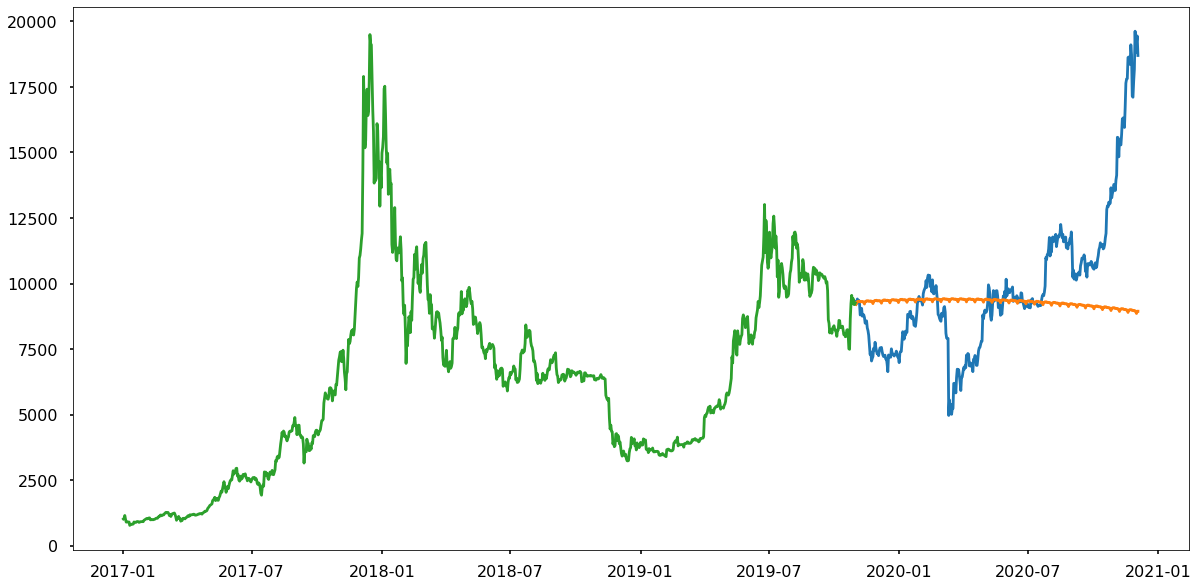

In [60]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df_valid[['next_close', 'Forecast_ARIMAX']])
plt.plot(df_train['next_close'])

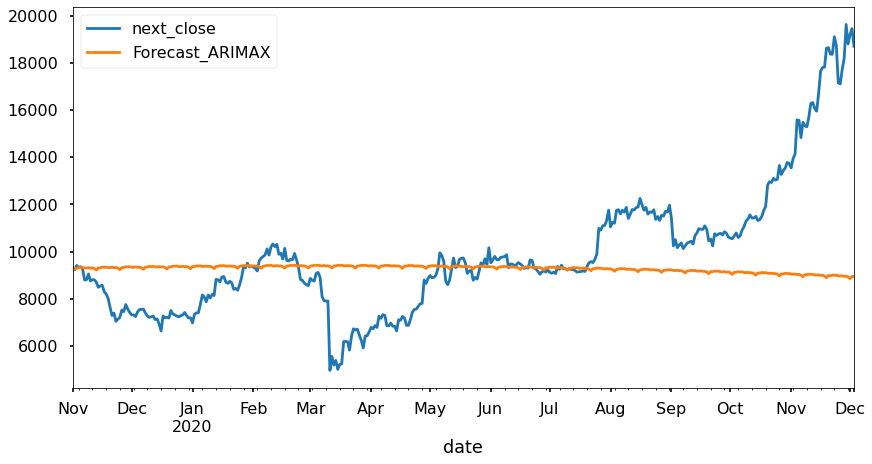

In [61]:
df_valid[['next_close', 'Forecast_ARIMAX']].plot(figsize=(14,7))


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(df_valid.close, df_valid.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMA:", mean_absolute_error(df_valid.close, df_valid.Forecast_ARIMAX))


RMSE of Auto ARIMA: 2895.7560818050965

MAE of Auto ARIMA: 1946.3828549039079


**Using Prophet**

In [ ]:
!pip install fbprophet
from fbprophet import Prophet

In [ ]:
model2 = Prophet()

df_train2 = df[(df['date'] < '2019-11-01') & (df['date'] >= '2017-01-01')]

df_test2 = df[df['date'] >= '2019-11-01']

train2 = df_train2[['close', 'date']]
train2.index = train2['date']

test2 = df_test2[['close', 'date']]
test2.index = test2['date']

train2.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)
test2.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

In [ ]:
train2

,y,ds
date,,
2017-01-01,1003.080017,2017-01-01
2017-01-02,1031.390015,2017-01-02
2017-01-03,1044.079956,2017-01-03
2017-01-04,1159.420044,2017-01-04
2017-01-05,1191.099976,2017-01-05
...,...,...
2019-10-27,9749.529666,2019-10-27
2019-10-28,9805.118089,2019-10-28
2019-10-29,9516.181048,2019-10-29


In [ ]:
model2.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


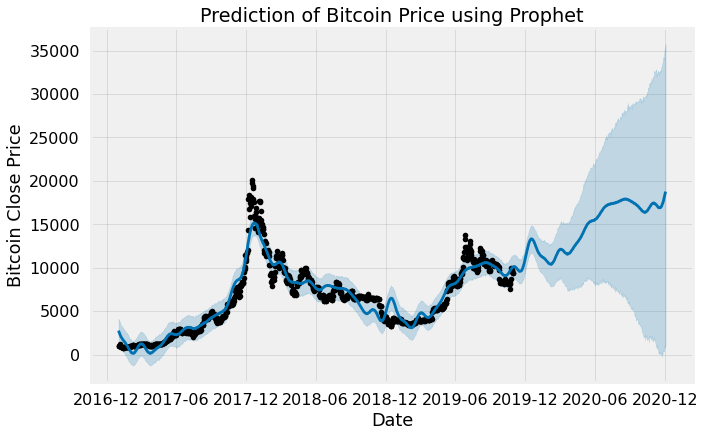

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
close_prices = model2.make_future_dataframe(periods=len(test2))
forecast = model2.predict(close_prices)
model2.plot(forecast)

plt.title("Prediction of Bitcoin Price using Prophet")
plt.xlabel("Date")
plt.ylabel("Bitcoin Close Price")
plt.show()

In [ ]:
predict_prophet = forecast[forecast['ds'] >= '2019-11-01']['yhat']

# rms=np.sqrt(np.mean(np.power((np.array(test2['y'])-np.array(predict_prophet)),2)))
# rms

print("RMSE of Prophet:", np.sqrt(mean_squared_error(test2['y'], predict_prophet)))

print("\nMAE of Prophet:", mean_absolute_error(np.array(test2['y']), np.array(predict_prophet)))

RMSE of Prophet: 5078.0951156066985

MAE of Prophet: 4569.048193384787


In [ ]:
test2

,y,ds
date,,
2019-11-01,9275.657271,2019-11-01
2019-11-02,9377.486567,2019-11-02
2019-11-03,9379.806872,2019-11-03
2019-11-04,9505.051676,2019-11-04
2019-11-05,9457.418435,2019-11-05
...,...,...
2020-11-29,18283.628173,2020-11-29
2020-11-30,19749.263694,2020-11-30
2020-12-01,19845.975483,2020-12-01


In [ ]:
predict_prophet

1034    10111.729328
1035    10149.361881
1036    10119.787875
1037    10134.525537
1038    10125.145861
            ...     
1428    17965.619431
1429    18177.594787
1430    18383.288934
1431    18575.288403
1432    18773.748190
Name: yhat, Length: 399, dtype: float64

In [ ]:
test2.reset_index(drop=True, inplace=True)
predict_prophet.reset_index(drop=True, inplace=True)

prophet_result = pd.concat([test2, predict_prophet], axis=1, ignore_index=True)
prophet_result

,0,1,2
0,9275.657271,2019-11-01,10111.729328
1,9377.486567,2019-11-02,10149.361881
2,9379.806872,2019-11-03,10119.787875
3,9505.051676,2019-11-04,10134.525537
4,9457.418435,2019-11-05,10125.145861
...,...,...,...
394,18283.628173,2020-11-29,17965.619431
395,19749.263694,2020-11-30,18177.594787
396,19845.975483,2020-12-01,18383.288934
397,19308.330663,2020-12-02,18575.288403


In [ ]:
prophet_result.columns = ['close', 'date', 'prophet_predict']

In [ ]:
prophet_result.index = prophet_result['date']
prophet_result

,close,date,prophet_predict
date,,,
2019-11-01,9275.657271,2019-11-01,10111.729328
2019-11-02,9377.486567,2019-11-02,10149.361881
2019-11-03,9379.806872,2019-11-03,10119.787875
2019-11-04,9505.051676,2019-11-04,10134.525537
2019-11-05,9457.418435,2019-11-05,10125.145861
...,...,...,...
2020-11-29,18283.628173,2020-11-29,17965.619431
2020-11-30,19749.263694,2020-11-30,18177.594787
2020-12-01,19845.975483,2020-12-01,18383.288934


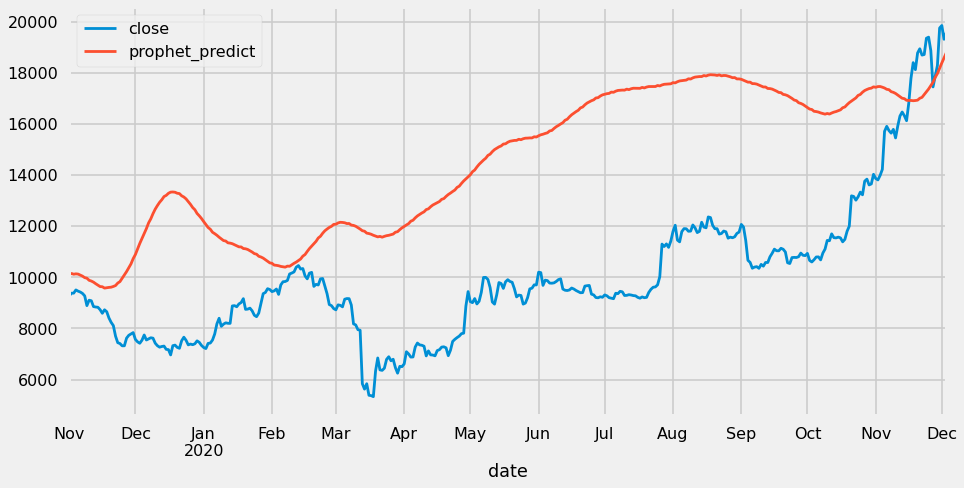

In [ ]:
prophet_result[['close', 'prophet_predict']].plot(figsize=(14,7))

# **GRU Model**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout, BatchNormalization, LeakyReLU, GRU
from keras.optimizers import SGD, Adagrad, RMSprop, Adam, Adadelta, Nadam

import matplotlib.pyplot as plt
import math

#import talib



# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'
# os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# set_session(tf.compat.v1.Session(config=config))

# with h5py.File(''.join(['bitcoin2015to2017_close.h5']), 'r') as hf:
#     datas = hf['inputs'].value
#     labels = hf['outputs'].value


# output_file_name='bitcoin2015to2017_close_GRU_1_tanh_relu_'

# step_size = 1
# units= 50
# batch_size = 8
# nb_features = data.shape[1]
# epochs = 100
# output_size=2
#split training validation
training_size = len(data['2013-04-28': '2020-07-31'])
training_set = data.iloc[:2652, 3:4].values
test_set = data.iloc[2652:, 3:4].values
sc = MinMaxScaler(feature_range = (-5, 5))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(test_set)

# labels = data.close
# data1 = data.drop(columns=['close'])
# training_size = len(data1['2013-04-28': '2020-07-31'])
# training_datas = data1['2013-04-28': '2020-07-31']
# training_labels = labels[:training_size]
# validation_datas = data1['2020-08-01': '2020-12-04']
# validation_labels = labels[training_size:]

look_back = 1

def create_dataset(dataset, look_back=14):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(training_set_scaled, look_back)
testX, testY = create_dataset(testing_set_scaled, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)





(2650, 1, 1)
(124, 1, 1)


In [ ]:
# LSTM 
model = Sequential()
model.add(GRU(200, input_shape=(1, look_back), return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(1))
'''
model = Sequential()
model.add(CuDNNLSTM(200, input_shape=(1, look_back)))
#model.add(Dropout(0.2)) #오버피팅을 막고자 일부를 버림
#model.add(BatchNormalization())
model.add(Dense(1))
#model.add(Dense(1, activation='relu'))
'''
# 
opt = Adam(lr=0.0005)

model.compile(loss='mean_squared_error', optimizer=opt)
#model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])

history = model.fit(
    trainX, trainY,
    epochs=200,
    batch_size=128,
    validation_data = (testX, testY),
    verbose=1)

Epoch 1/200
21/21 [==============================] - 1s 29ms/step - loss: 11.0732 - val_loss: 6.0554
Epoch 2/200
21/21 [==============================] - 0s 4ms/step - loss: 2.5798 - val_loss: 1.1525
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.3730 - val_loss: 1.0796
Epoch 4/200
21/21 [==============================] - 0s 4ms/step - loss: 0.2139 - val_loss: 1.0571
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1941 - val_loss: 1.0339
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1877 - val_loss: 1.0107
Epoch 7/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1802 - val_loss: 0.9858
Epoch 8/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1747 - val_loss: 0.9571
Epoch 9/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1721 - val_loss: 0.9298
Epoch 10/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1682 - val_loss: 0.9012
Epoch 1

In [ ]:
#from sklearn.preprocessing import MinMaxScaler# make prediction
testPredict = model.predict(testX)
testPredict = sc.inverse_transform(testPredict)
testY = sc.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 406.51 RMSE


In [58]:
print("\nMAE of GRU:", mean_absolute_error(testY, testPredict))



MAE of GRU: 270.44206077911304


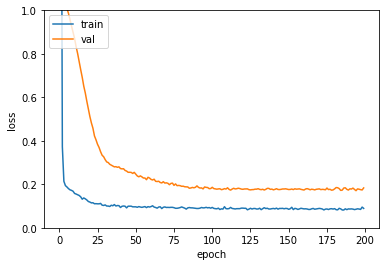

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0.0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
lastX = testing_set_scaled[-1]

lastX = np.reshape(lastX, (1, 1, 1))
lastY = model.predict(lastX)
lastY = sc.inverse_transform(lastY)
lastY

array([[18471.03]], dtype=float32)

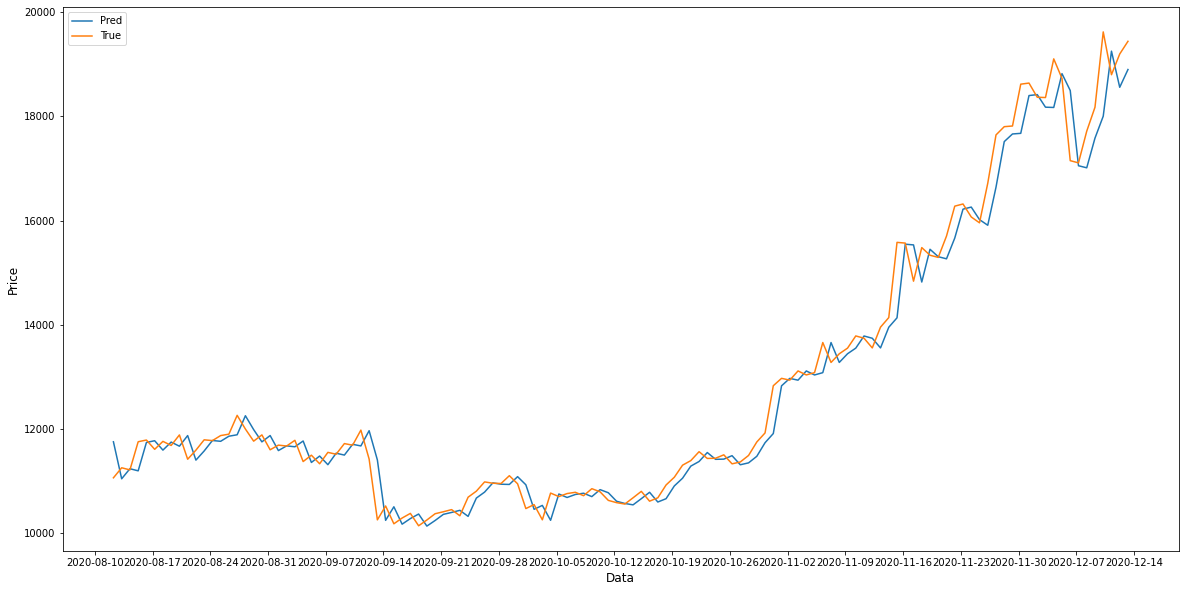

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

now = dt.datetime.now()
then = now - dt.timedelta(days=testX.shape[0])
days = mdates.drange(then,now,dt.timedelta(days=1))
x = days

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.plot(x,testPredict,label='Pred')
plt.plot(x,testY,label='True')
ax.legend()
plt.xlabel('Data', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [ ]:
testX.shape

(124, 1, 1)

# **LSTM Model**

In [67]:
import math
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential


In [63]:
df=pd.read_csv("data.csv")
## split train test at 2020-7-31
df_close = df.iloc[:,2:3]
train = df.iloc[:2652, 2:3].values
test = df.iloc[2652:, 2:3].values
## scale 0 to 1
scale = MinMaxScaler(feature_range = (0, 1))
train = scale.fit_transform(train)

In [64]:
X_train = []
y_train = []
for i in range(60, 2652):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [65]:
# Test
## add a window to test set
test_window = df_close[len(df_close) - len(test)-60:].values

## normalize test set
test_window = scale.fit_transform(test_window)

X_test = []
for i in range(60,len(test_window)):
    X_test.append(test_window[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(126, 60, 1)


In [68]:
lstm = Sequential()
lstm.add(tfkl.LSTM(128, input_shape=(X_train.shape[1], 1)))
lstm.add(tfkl.Dense(1,activation = "sigmoid"))
lstm.compile(loss = 'mean_squared_error',optimizer = tfk.optimizers.Adam(lr=0.001, decay=1e-6))
results = lstm.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
81/81 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 2/30
81/81 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 3/30
81/81 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 4/30
81/81 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 5/30
81/81 [==============================] - 0s 4ms/step - loss: 9.7392e-04
Epoch 6/30
81/81 [==============================] - 0s 4ms/step - loss: 8.4307e-04
Epoch 7/30
81/81 [==============================] - 0s 4ms/step - loss: 8.4727e-04
Epoch 8/30
81/81 [==============================] - 0s 4ms/step - loss: 9.3346e-04
Epoch 9/30
81/81 [==============================] - 0s 4ms/step - loss: 6.7587e-04
Epoch 10/30
81/81 [==============================] - 0s 4ms/step - loss: 6.5438e-04
Epoch 11/30
81/81 [==============================] - 0s 5ms/step - loss: 6.1687e-04
Epoch 12/30
81/81 [==============================] - 0s 5ms/step - loss: 5.7402e-04
Epoch 13/30
81/81

In [69]:
results.history["loss"][29]

0.0003511750546749681

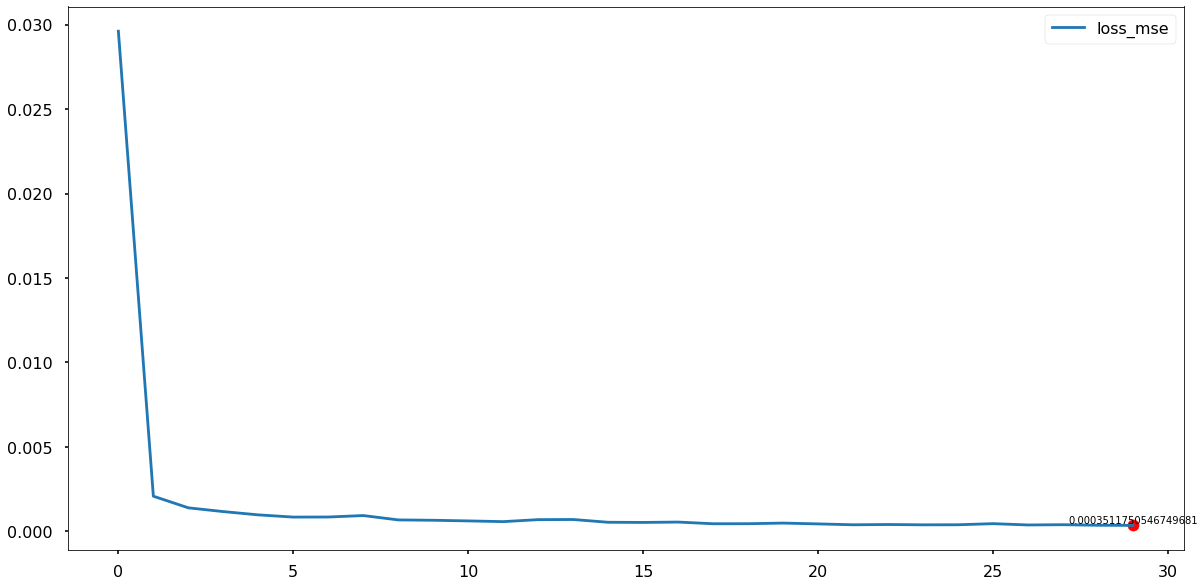

In [70]:
plt.plot(results.history["loss"])
plt.scatter(29,results.history["loss"][29],color = 'red')
plt.text(29,results.history["loss"][29],results.history["loss"][29],verticalalignment='bottom',horizontalalignment='center')
plt.legend(labels=["loss_mse"])

In [71]:
pred_price = lstm.predict(X_test)
pred_price = scale.inverse_transform(pred_price)

In [72]:
date = df['date']
date = date[2652:]

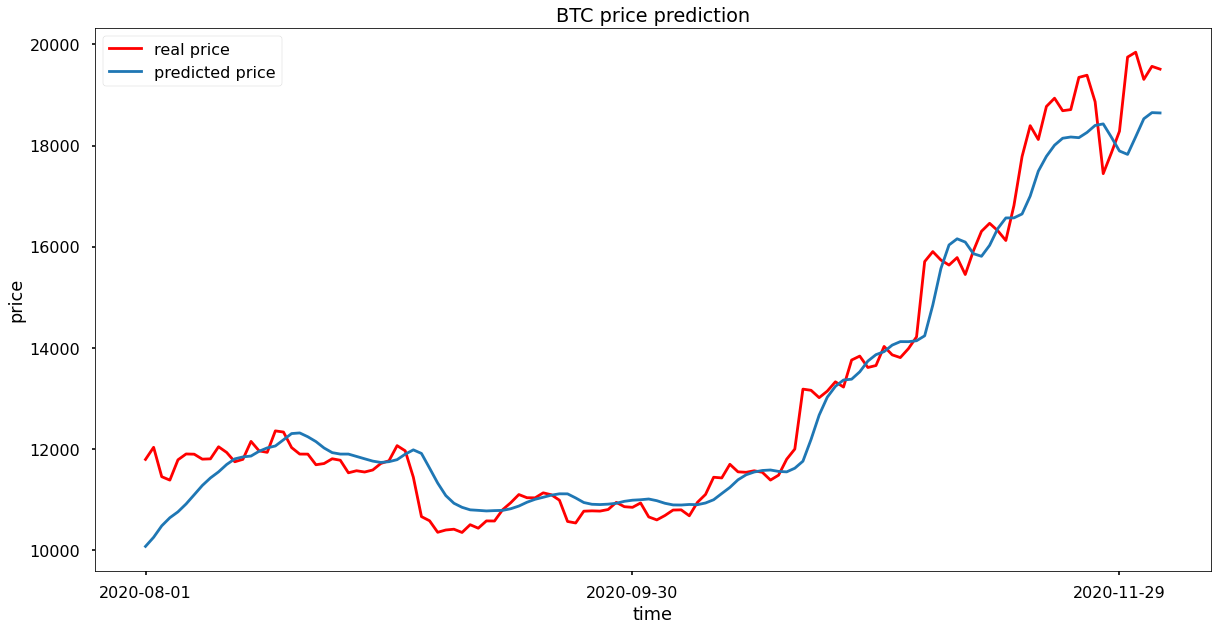

In [73]:

plt.plot(date,test,color = 'red',label = 'real price')
plt.plot(date,pred_price,label = 'predicted price')
plt.xticks(np.arange(0,126,60))
plt.rcParams["figure.figsize"] = [9,7]
plt.title("BTC price prediction")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [74]:
### predict without test data
test_window = df_close[len(df_close) - len(test)-60:].values

## normalize test set
test_window = scale.fit_transform(test_window)
len(test_window[:60])
sequence = test_window[:60]
for i in range(60,len(test_window)):
    X_test = []
    X_test.append(sequence[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    pred_price = lstm.predict(X_test)
    shape = len(sequence)
    sequence = np.reshape(sequence,(shape,))
    pred_price = np.reshape(pred_price,(1,))
    sequence = np.append(sequence, pred_price)
    shape = len(sequence)
    sequence = np.reshape(sequence,(shape,1))
sequence = sequence[60:]

In [75]:
sequence = scale.inverse_transform(sequence)

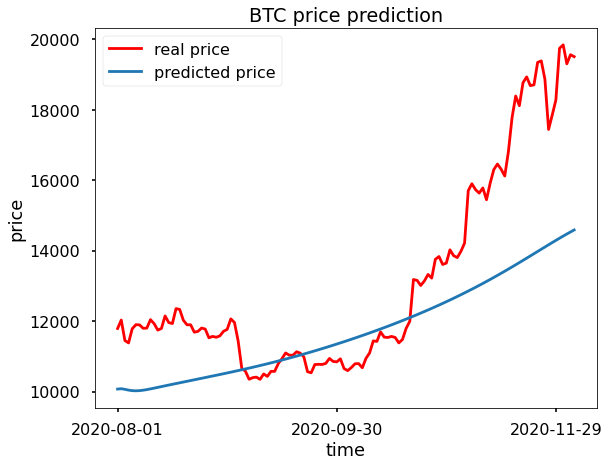

In [76]:
plt.plot(date,test,color = 'red',label = 'real price')
plt.plot(date,sequence,label = 'predicted price')
plt.xticks(np.arange(0,126,60))
plt.rcParams["figure.figsize"] = [9,7]
plt.title("BTC price prediction")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()